In [ ]:
# Libraries import
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

##### Pandas (pd): for manipulating tabular data (CSV files, DataFrames).
##### NumPy (np) : provides tools for working with tables and mathematical functions.
##### KMeans : implements the k-means clustering algorithm.
##### StandardScaler : standardises data to improve the performance of machine learning algorithms.
##### Matplotlib and Seaborn : tools for creating graphs and viewing data.

In [ ]:
# Load data
drivers_data = pd.read_csv('Driver_data.csv')

# Exploratory Analysis
print("Preview of driver data :")
print(drivers_data.head())
print('\n')
print(drivers_data.describe())

# Data Standardization
scaler = StandardScaler()
drivers_scaled = scaler.fit_transform(drivers_data.iloc[:, 1:])  # Assuming columns 2 et suivantes contain relevant features


Aperçu des données des conducteurs :
    Driver_ID  Distance_Feature  Speeding_Feature
0  3423311935             71.24                28
1  3423313212             52.53                25
2  3423313724             64.54                27
3  3423311373             55.69                22
4  3423310999             54.58                25


          Driver_ID  Distance_Feature  Speeding_Feature
count  4.000000e+03       4000.000000       4000.000000
mean   3.423312e+09         76.041522         10.721000
std    1.154845e+03         53.469563         13.708543
min    3.423310e+09         15.520000          0.000000
25%    3.423311e+09         45.247500          4.000000
50%    3.423312e+09         53.330000          6.000000
75%    3.423313e+09         65.632500          9.000000
max    3.423314e+09        244.790000        100.000000


##### Load data: reads a CSV file named Driver_data.csv into a drivers_data DataFrame.
##### Data mining :
##### - head(): displays the first 5 lines for preview purposes.
##### - describe(): generates descriptive statistics (mean, standard deviation, etc.) for each numeric column.
##### Standardisation: the columns from the second onwards are standardised to have a mean of 0 and a standard deviation of 1, which improves the performance of k-means.

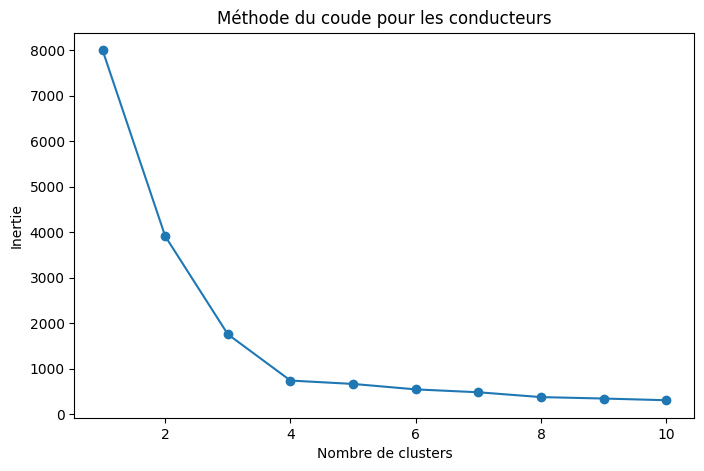

In [ ]:
# Identify the optimum number of clusters (Elbow method)
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(drivers_scaled)
    inertia.append(kmeans.inertia_)

# Visualisation of the Elbow method
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Méthode du coude pour les conducteurs")
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")
plt.show()


##### Purpose: identify the optimal number of clusters for k-means.
##### Inertia :
##### - Measures the quality of the clusters: the lower the quality, the closer the points are to their centre.
##### - Calculated for each value of k (from 1 to 10).
##### Visualization :
##### - The graph shows inertia as a function of k.
##### - The ‘kink’ in the graph (the point at which the reduction in inertia decreases sharply) indicates the optimum number of clusters.

In [ ]:
# Apply K-means with the optimal number of clusters
optimal_k = 4  # Let's assume 4 clusters after analysis
kmeans_drivers = KMeans(n_clusters=optimal_k, random_state=42)
drivers_data['Cluster'] = kmeans_drivers.fit_predict(drivers_scaled)


##### Optimal number of clusters: let's assume that the previous analysis determined that k = 4 is optimal.
##### Clustering :
##### - fit_predict: trains the model and assigns a cluster to each point.
##### Added to the dataframe: the cluster column is added to drivers_data, indicating the cluster for each driver.

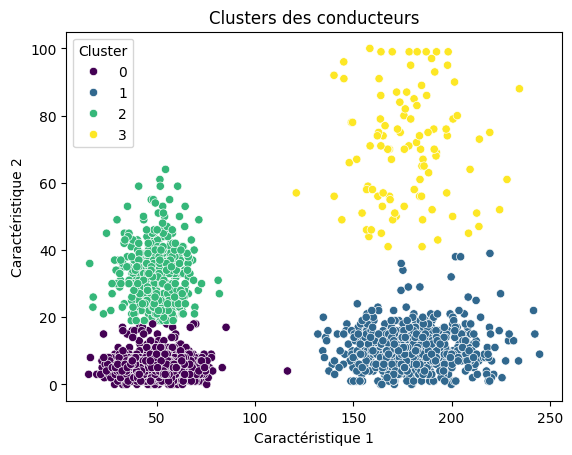

In [22]:
# Clusters visualization
sns.scatterplot(
    x=drivers_data.iloc[:, 1], 
    y=drivers_data.iloc[:, 2], 
    hue=drivers_data['Cluster'], 
    palette='viridis'
)
plt.title("Clusters des conducteurs")
plt.xlabel("Caractéristique 1")
plt.ylabel("Caractéristique 2")
plt.show()


##### Visualization :
##### - A scatter plot shows the clusters in two dimensions.
##### - The points are coloured according to their cluster.
##### Axes: x and y represent two characteristics (assumed to be columns 2 and 3 of the dataframe).